<a href="https://colab.research.google.com/github/neehasajja/waymo-opendataset/blob/main/testing/lidar_pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip3 install waymo-open-dataset-tf-2-6-0

In [3]:
import os
import pyarrow.parquet as pq
import tensorflow as tf


# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_pose/'
# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the metadata
        metadata = parquet_file.metadata

        # Print the metadata
        print("File:", filename)
        print(metadata)

File: 10504764403039842352_460_000_480_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 166
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4878
File: 14188689528137485670_2660_000_2680_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 198
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4886
File: 14737335824319407706_1980_000_2000_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 199
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4885
File: 10980133015080705026_780_000_800_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 198
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4877
File: 11987368976578218644_1340_000_1360_000.parquet
  created_by: parquet-cpp-arrow version 10.0.1
  num_columns: 6
  num_rows: 198
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4886
File: 152

In [5]:
import os
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt

# Set the path to the directory containing the parquet files
dir_path = '/content/drive/MyDrive/testing/lidar_pose/'

# Get a list of all the files in the directory
files = os.listdir(dir_path)

# Loop through each file and extract metadata
for filename in files:
    # Skip directories
    if os.path.isdir(os.path.join(dir_path, filename)):
        continue
        
    # Check if the file is a parquet file
    if filename.endswith('.parquet'):
        # Read the parquet file
        parquet_file = pq.ParquetFile(os.path.join(dir_path, filename))

        # Get the table from the file
        table = parquet_file.read()

        # Convert the table to a Pandas DataFrame
        df = table.to_pandas()

        # Calculate column statistics
        statistics = df.describe()

        # Print the statistics
        print("File:", filename)
        print(statistics)
  

File: 10504764403039842352_460_000_480_000.parquet
       key.frame_timestamp_micros  key.laser_name
count                1.660000e+02           166.0
mean                 1.558061e+15             1.0
std                  6.036114e+06             0.0
min                  1.558061e+15             1.0
25%                  1.558061e+15             1.0
50%                  1.558061e+15             1.0
75%                  1.558061e+15             1.0
max                  1.558061e+15             1.0
File: 14188689528137485670_2660_000_2680_000.parquet
       key.frame_timestamp_micros  key.laser_name
count                1.980000e+02           198.0
mean                 1.555688e+15             1.0
std                  5.719822e+06             0.0
min                  1.555688e+15             1.0
25%                  1.555688e+15             1.0
50%                  1.555688e+15             1.0
75%                  1.555688e+15             1.0
max                  1.555688e+15             

In [6]:
import pyarrow.parquet as pq
import pandas as pd

# Set the path to the Parquet file
parquet_file_path = '/content/drive/MyDrive/testing/lidar_pose/file1.parquet'

# Read the Parquet file into a Pyarrow table
table = pq.read_table(parquet_file_path)

# Convert the table to a Pandas DataFrame
df = table.to_pandas()

# Print the first 10 rows of the DataFrame
print(df.head(10))

                                                                 key.segment_context_name  \
index                                                                                       
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  2601205676330128831_4880_000_4900_000   
2601205676330128831_4880_000_4900_000;155518323...  260120567633012883

In [ ]:
!pip install matplotlib

In [12]:
print(df.columns)

Index(['key.segment_context_name', 'key.frame_timestamp_micros',
       'key.laser_name', '[LiDARPoseComponent].range_image_return1.values',
       '[LiDARPoseComponent].range_image_return1.shape'],
      dtype='object')


In [13]:
schema = parquet_file.schema
print(schema)

required group field_id=-1 schema {
  optional binary field_id=-1 index (String);
  optional binary field_id=-1 key.segment_context_name (String);
  optional int64 field_id=-1 key.frame_timestamp_micros;
  optional int32 field_id=-1 key.laser_name (Int(bitWidth=8, isSigned=true));
  optional group field_id=-1 [LiDARPoseComponent].range_image_return1.values (List) {
    repeated group field_id=-1 list {
      optional float field_id=-1 item;
    }
  }
  optional group field_id=-1 [LiDARPoseComponent].range_image_return1.shape (List) {
    repeated group field_id=-1 list {
      optional int32 field_id=-1 item;
    }
  }
}



In [ ]:
import matplotlib.pyplot as plt
# Extract the lidar data from the Parquet file
lidar_data = table.to_pandas()['[LiDARPoseComponent].range_image_return1.shape'].shape[0]

# Reshape the data to a 2D array
lidar_data = lidar_data.reshape((-1, 5))

# Plot the lidar points
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lidar_data[:, 0], lidar_data[:, 1], lidar_data[:, 2], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

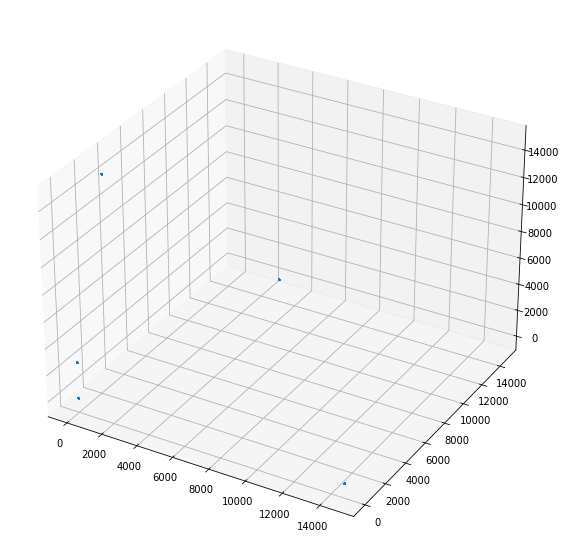

In [22]:
import matplotlib.pyplot as plt

df = df.rename(columns={
    'key.segment_context_name': 'segment_context_name',
    'key.frame_timestamp_micros': 'frame_timestamp_micros',
    'key.laser_name': 'laser_name',
    '[LiDARPoseComponent].range_image_return1.values': 'range_image_return1_values',
    '[LiDARPoseComponent].range_image_return1.shape': 'range_image_return1_shape'
})

# Plot the lidar points
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(lidar_data[:, 0], lidar_data[:, 1], lidar_data[:, 2], s=1)
plt.show()

In [ ]:
import open3d as o3d

# Convert the range image to a point cloud
intrinsics = o3d.camera.PinholeCameraIntrinsic(2048, 64, 1996.48, 976.24, 2048.0, 64.0)
lidar_pose = np.array([[0, -1, 0, 0], [0, 0, -1, 0], [1,